# Digit Recognizer using MNIST Dataset

## Problem Statement

### A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

 

### The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 

## Objective

### We required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 

## Data Description


### For this problem, we use the MNIST data which is a large database of handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label. 

 

### Since each image is of 28 x 28 pixels, and each pixel forms a feature, there are 784 features.

# Techniques and Procedure

## 1. Data understanding
## 2. Data cleaning
## 3. Data preparation
## 4. Model building

In [1]:
##importing the libraries

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

### Loading data

In [2]:
data_train = pd.read_csv("C:/Users/hp/Desktop/train.csv") 

In [3]:
# seeing some data

data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Dimensions: ", data_train.shape, "\n")

Dimensions:  (42000, 785) 



In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
four = data_train.iloc[3, 1:]
four.shape

(784,)

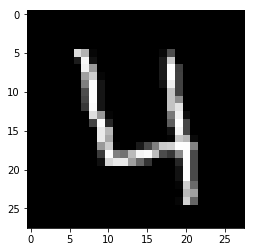

In [9]:
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [10]:
# array

# visualise the array
print(four[5:-5, 5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [11]:
# how many labels of each digit are present

data_train.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [12]:
data_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [13]:
data_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [14]:
print("List of digits : ", list(np.sort(data_train.label.unique())))

List of digits :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


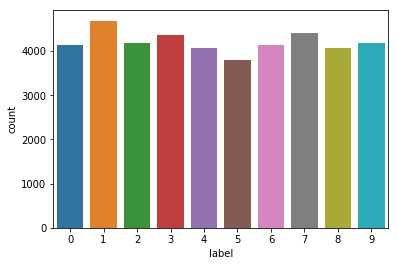

In [15]:
sns.countplot(data_train.label)

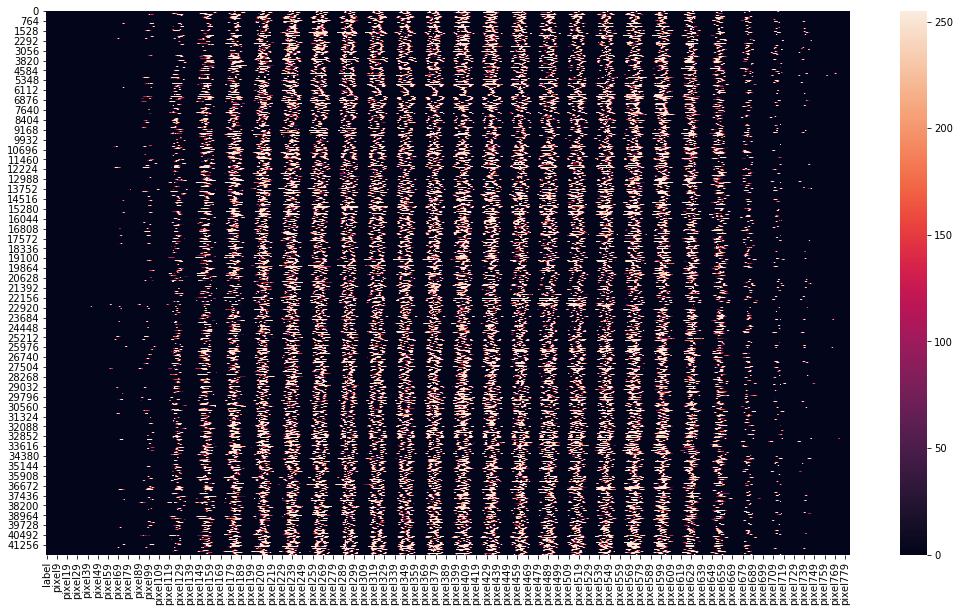

In [16]:
plt.figure(figsize=(18, 10))
sns.heatmap(data_train)

In [19]:
#  in terms of percentage 

100*(round(data_train.label.astype('category').value_counts()/len(data_train.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

### Each label is having around 9-11% fraction

### Hence the dataset is balanced.

### Therefore, it's good to perform SVM here!

## Missing values

In [20]:
data_train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [21]:
data_train.isna()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
data_train.isna().sum().any()

False

In [23]:
## checking for negative values in data
data_train[(data_train<0).all(1)]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


### As the train data is huge and test data has no label so to evaluate the model we will split the train data into train and test

In [25]:
data_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Observation

## 1. The maximum value of the mean and maximum values of some features (pixels) is 139, 255 and so on...
## 2. Most of the features are in lower range, like pixel0, pixel1 and so on...

##  We will rescale our features

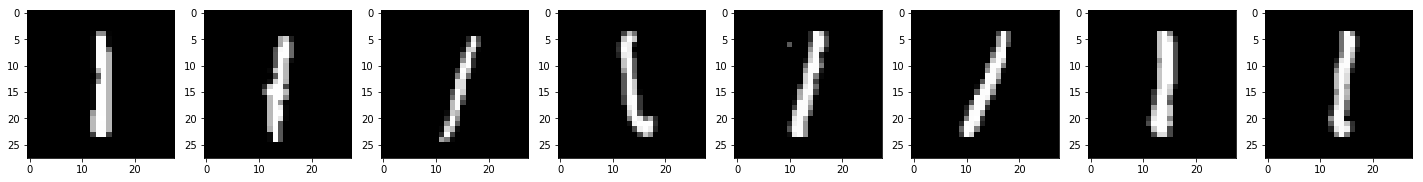

In [26]:
plt.figure(figsize=(28,28))

digit_1 = data_train.loc[data_train.label==1,:]
digit_image = digit_1.iloc[:,1:]
subplots_loc = 191

for i in range(1,9):
    plt.subplot(subplots_loc)
    four = digit_image.iloc[i].values.reshape(28, 28)
    plt.imshow(four, cmap='gray')
    subplots_loc = subplots_loc +1

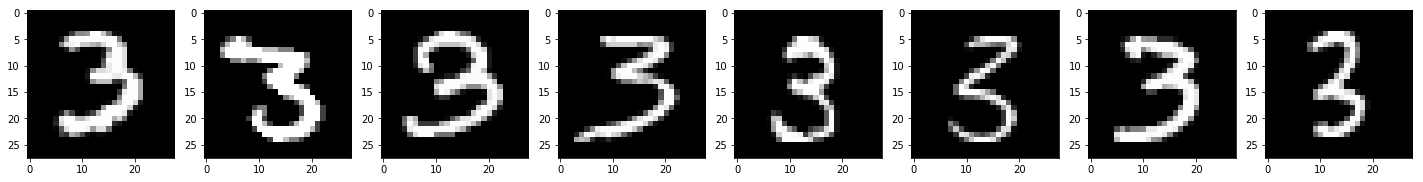

In [27]:
#Lets see digit "3" images in the data.


plt.figure(figsize=(28,28))

digit_3 = data_train.loc[data_train.label==3,:]
digit_image = digit_3.iloc[:,1:]
subplots_loc = 191

for i in range(1,9):
    plt.subplot(subplots_loc)
    four = digit_image.iloc[i].values.reshape(28, 28)
    plt.imshow(four, cmap='gray')
    subplots_loc = subplots_loc +1

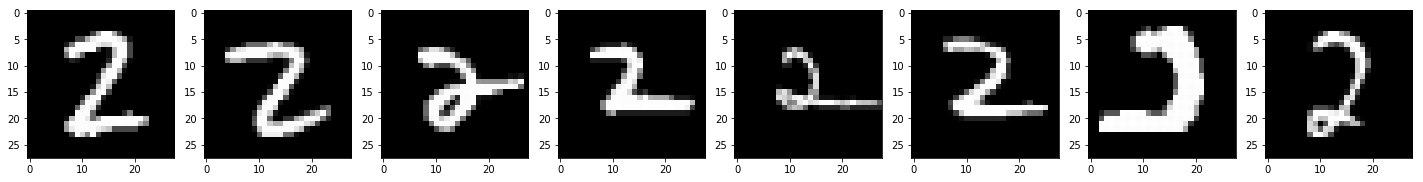

In [28]:
#Lets see digit "2" images in the data.


plt.figure(figsize=(28,28))

digit_2 = data_train.loc[data_train.label==2,:]
digit_image = digit_2.iloc[:,1:]
subplots_loc = 191

for i in range(1,9):
    plt.subplot(subplots_loc)
    four = digit_image.iloc[i].values.reshape(28, 28)
    plt.imshow(four, cmap='gray')
    subplots_loc = subplots_loc +1

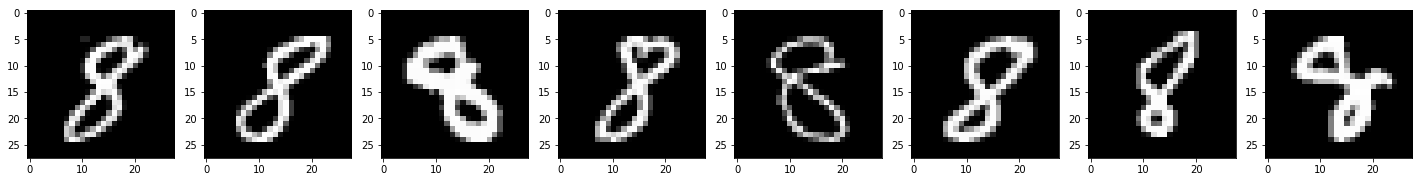

In [29]:
#Lets see digit "8" images in the data.


plt.figure(figsize=(28,28))

digit_8 = data_train.loc[data_train.label==8,:]
digit_image = digit_8.iloc[:,1:]
subplots_loc = 191

for i in range(1,9):
    plt.subplot(subplots_loc)
    four = digit_image.iloc[i].values.reshape(28, 28)
    plt.imshow(four, cmap='gray')
    subplots_loc = subplots_loc +1

## Model Building

In [31]:
## We will use a fraction of dataset or else data will take longer time. 

## # Splitting the data into train and test
X = data_train.iloc[:, 1:]
Y = data_train.iloc[:, 0]


In [32]:
# Rescaling the features

X = scale(X)

In [33]:
# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [34]:
print(x_train.shape)
print(x_test.shape)


(4200, 784)
(37800, 784)


In [35]:
print(y_train.shape)
print(y_test.shape)

(4200,)
(37800,)


## Linear SVM

In [37]:
from sklearn import svm
from sklearn import metrics
svm_linear = svm.SVC(kernel='linear')

In [38]:
svm_linear.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
# Predict
predictions = svm_linear.predict(x_test)
predictions[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6], dtype=int64)

In [43]:
# Accuracy
confusion_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion_matrix

array([[3615,    0,   12,    8,    8,   28,   28,    5,    9,    2],
       [   0, 4089,   16,   23,    9,    3,    3,   13,   25,    4],
       [  54,   48, 3363,   64,   74,   13,   53,   52,   59,   10],
       [  20,   28,  121, 3387,    8,  175,    5,   54,   58,   44],
       [  12,   12,   26,    2, 3399,    7,   41,   41,    4,  158],
       [  49,   42,   32,  177,   41, 2899,   54,   14,   82,   28],
       [  36,   16,   55,    5,   34,   37, 3486,    3,   21,    0],
       [   9,   27,   37,   22,   70,   10,    4, 3619,   14,  142],
       [  26,   86,   71,  137,   24,  137,   29,   26, 3096,   33],
       [  38,   11,   39,   26,  182,   19,    1,  207,   27, 3228]],
      dtype=int64)

In [44]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=predictions))

accuracy: 0.9042592592592592


In [45]:
# class-wise accuracy
class_wise_accuracy = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise_accuracy)

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      3715
          1       0.94      0.98      0.96      4185
          2       0.89      0.89      0.89      3790
          3       0.88      0.87      0.87      3900
          4       0.88      0.92      0.90      3702
          5       0.87      0.85      0.86      3418
          6       0.94      0.94      0.94      3693
          7       0.90      0.92      0.91      3954
          8       0.91      0.84      0.88      3665
          9       0.88      0.85      0.87      3778

avg / total       0.90      0.90      0.90     37800



## Non-Linear SVM

In [48]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
# predict
predictions = svm_rbf.predict(x_test)

# accuracy 
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.9255820105820106


### The accuracy achieved with a non-linear kernel is slightly higher than a linear one. Let's now do a grid search CV to tune the hyperparameters C and gamma.

## Grid Search Cross-Validation

In [51]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,51.889690,0.651221,6.442965,0.366039,1,0.01,"{'C': 1, 'gamma': 0.01}",0.703571,0.738095,0.728571,...,0.725238,0.021736,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,16.467899,0.256940,4.111881,0.167324,1,0.001,"{'C': 1, 'gamma': 0.001}",0.915476,0.914286,0.917857,...,0.918333,0.004678,4,0.966667,0.971131,0.971131,0.970536,0.965179,0.968929,0.002508
2,23.498463,0.342229,5.370364,0.254260,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.872619,0.869048,0.872619,...,0.875000,0.006163,8,0.898810,0.898512,0.897024,0.895536,0.896726,0.897321,0.001205
3,52.888339,1.187588,6.176649,0.175155,10,0.01,"{'C': 10, 'gamma': 0.01}",0.722619,0.754762,0.744048,...,0.741667,0.018642,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,13.765093,0.161136,3.752857,0.188790,10,0.001,"{'C': 10, 'gamma': 0.001}",0.919048,0.916667,0.917857,...,0.924048,0.007947,1,0.999405,0.999405,0.999405,0.999405,0.999702,0.999464,0.000119
5,10.773803,0.209517,3.384768,0.105276,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.905952,0.897619,0.913095,...,0.914286,0.011785,5,0.956250,0.963690,0.956845,0.961012,0.956548,0.958869,0.002973
6,50.248082,0.646020,5.997576,0.235005,100,0.01,"{'C': 100, 'gamma': 0.01}",0.722619,0.754762,0.744048,...,0.741667,0.018642,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,13.519302,0.183092,3.695093,0.138735,100,0.001,"{'C': 100, 'gamma': 0.001}",0.917857,0.917857,0.916667,...,0.923571,0.007730,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,8.374723,0.193798,2.847552,0.084283,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.895238,0.891667,0.907143,...,0.906429,0.012108,6,0.997917,0.997321,0.998214,0.996726,0.998214,0.997679,0.000577
9,50.196382,0.612172,5.781460,0.136802,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.722619,0.754762,0.744048,...,0.741667,0.018642,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


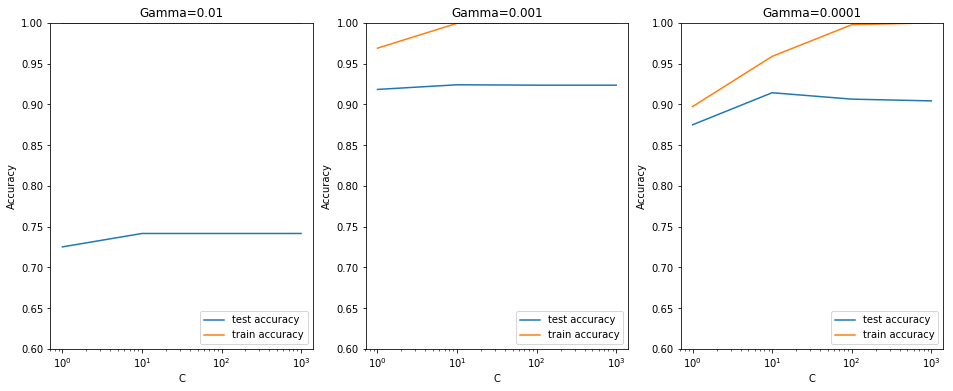

In [53]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

From the plot above, we can observe that (from higher to lower gamma):

At very high gamma (0.01), the model is achieving 100% accuracy on the training data, though the test score is quite low. Thus, the model is overfitting.

At gamma=0.001, the training and test scores are comparable at around C=10, though the model starts to overfit at higher values of C

At gamma=0.0001, the model does not overfit till C=10 but starts showing signs at C=100. 

Thus, it seems that the best combination is gamma=0.001 and C=10

### Final Model

In [81]:
# optimal hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))



The best test score is 0.924047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [82]:
best_C = 10
best_gamma = 0.001

In [83]:
#final model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

In [84]:
# fit
svm_final.fit(x_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
# predict
predictions = svm_final.predict(x_test)

In [86]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion_matrix

array([[3615,    0,   10,   12,    4,   12,   38,   11,   11,    2],
       [   0, 4107,   13,   18,    6,    2,    5,   21,    8,    5],
       [  30,   20, 3438,   60,   37,    4,   37,  112,   41,   11],
       [   8,    9,   92, 3547,    5,   88,    6,   71,   44,   30],
       [   4,   10,   32,    5, 3460,   11,   33,   46,    3,   98],
       [  22,   21,   12,  114,   20, 3059,   62,   50,   31,   27],
       [  27,    7,   11,    1,    9,   27, 3548,   47,   16,    0],
       [   5,   22,   21,   11,   49,    4,    2, 3749,   10,   81],
       [  10,   37,   47,   79,   21,   82,   25,   49, 3290,   25],
       [  15,    7,   18,   28,   97,   12,    0,  174,   15, 3412]],
      dtype=int64)

In [87]:
# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)
test_accuracy

0.9318783068783069

In [88]:
data_test = pd.read_csv("C:/Users/hp/Desktop/test.csv") 

In [89]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X_Scaled_Test=scale(data_test)

In [91]:
predicted_digits=svm_final.predict(X_Scaled_Test)

In [92]:
predicted_digits.shape

(28000,)

In [93]:
data = pd.DataFrame({'Label': predicted_digits})
data.head()

,Label
0,2
1,0
2,9
3,4
4,3


## Note -- We can test our model on any data that is either on the splitted test data or on the test.csv file.

# Conclusion

### We got a accuracy of approx 93%.
### We would have got more accuracy if we have used the entire training dataset. 